# A2 - Introdução à Ciência de Dados
## Análise Exploratória de Dados em Python

>#### Grupo:
>Amanda de Mendonça Perez - 211708002
>
>Douglas Arthur Almeida Hancock - 211708039
>
>Luigi Von Blücher Mezzogori - 202708901
>
>Pablo Julliano Gomes Fontenelle - 211708025

Fazendo uma análise dos gêneros de cada livro:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import csv

df = pd.read_csv('./GoodReads_100k_books.csv')

In [14]:
df = df.sort_values(by=["rating"],ascending=False)

lista_colunas =['genre', 'rating',  'totalratings']

df = df[lista_colunas]

In [15]:
df = df.sort_values(by=["rating"],ascending=False)

lista_colunas =['genre', 'rating',  'totalratings']



df.dropna(subset = ["genre"], inplace=True)

df.head()

,genre,rating,totalratings
64272,"Cities,Urban Planning",5.0,1
35521,"Esoterica,Astrology",5.0,2
50875,"Religion,Baha I",5.0,6
2422,"Religion,Baha I",5.0,6
65118,Canon,5.0,1


In [16]:
df=df[~(df['totalratings'] <= 40)]
df1=df.head(50)

In [17]:
df1 = Counter(" ".join(df1["genre"].str.replace(',', ' ')).split()).most_common(100)

In [18]:
df2 = pd.DataFrame(df1, columns= ['Genero', 'Frequencia'])

df2 = df2.drop(df2.index[(df2["Genero"] == "and")],axis=0,inplace=False)
df2 = df2.drop(df2.index[(df2["Genero"] == "I")],axis=0,inplace=False)
df2 = df2.drop(df2.index[(df2["Genero"] == "Short")],axis=0,inplace=False)
df2 = df2.drop(df2.index[(df2["Genero"] == "Stories")],axis=0,inplace=False)
df2 = df2.drop(df2.index[(df2["Genero"] == "Lds")],axis=0,inplace=False)
df2 = df2.drop(df2.index[(df2["Genero"] == "M")],axis=0,inplace=False)
df2 = df2.drop(df2.index[(df2["Genero"] == "Self")],axis=0,inplace=False)
df2 = df2.drop(df2.index[(df2["Genero"] == "Help")],axis=0,inplace=False)
df2 = df2.drop(df2.index[(df2["Genero"] == "Non")],axis=0,inplace=False)

linha_nova = {"Genero":"Short Stories","Frequencia":3}
linha_nova2 = {"Genero":"Self Help","Frequencia":1}

df2 = df2.append(linha_nova, ignore_index=True)
df2 = df2.append(linha_nova2, ignore_index=True)

df2 = df2.sort_values(by=["Frequencia"],ascending=False)

#df2.to_csv (r'C:/Users/Luigi/Desktop/Top94.csv', index = False, header=True)

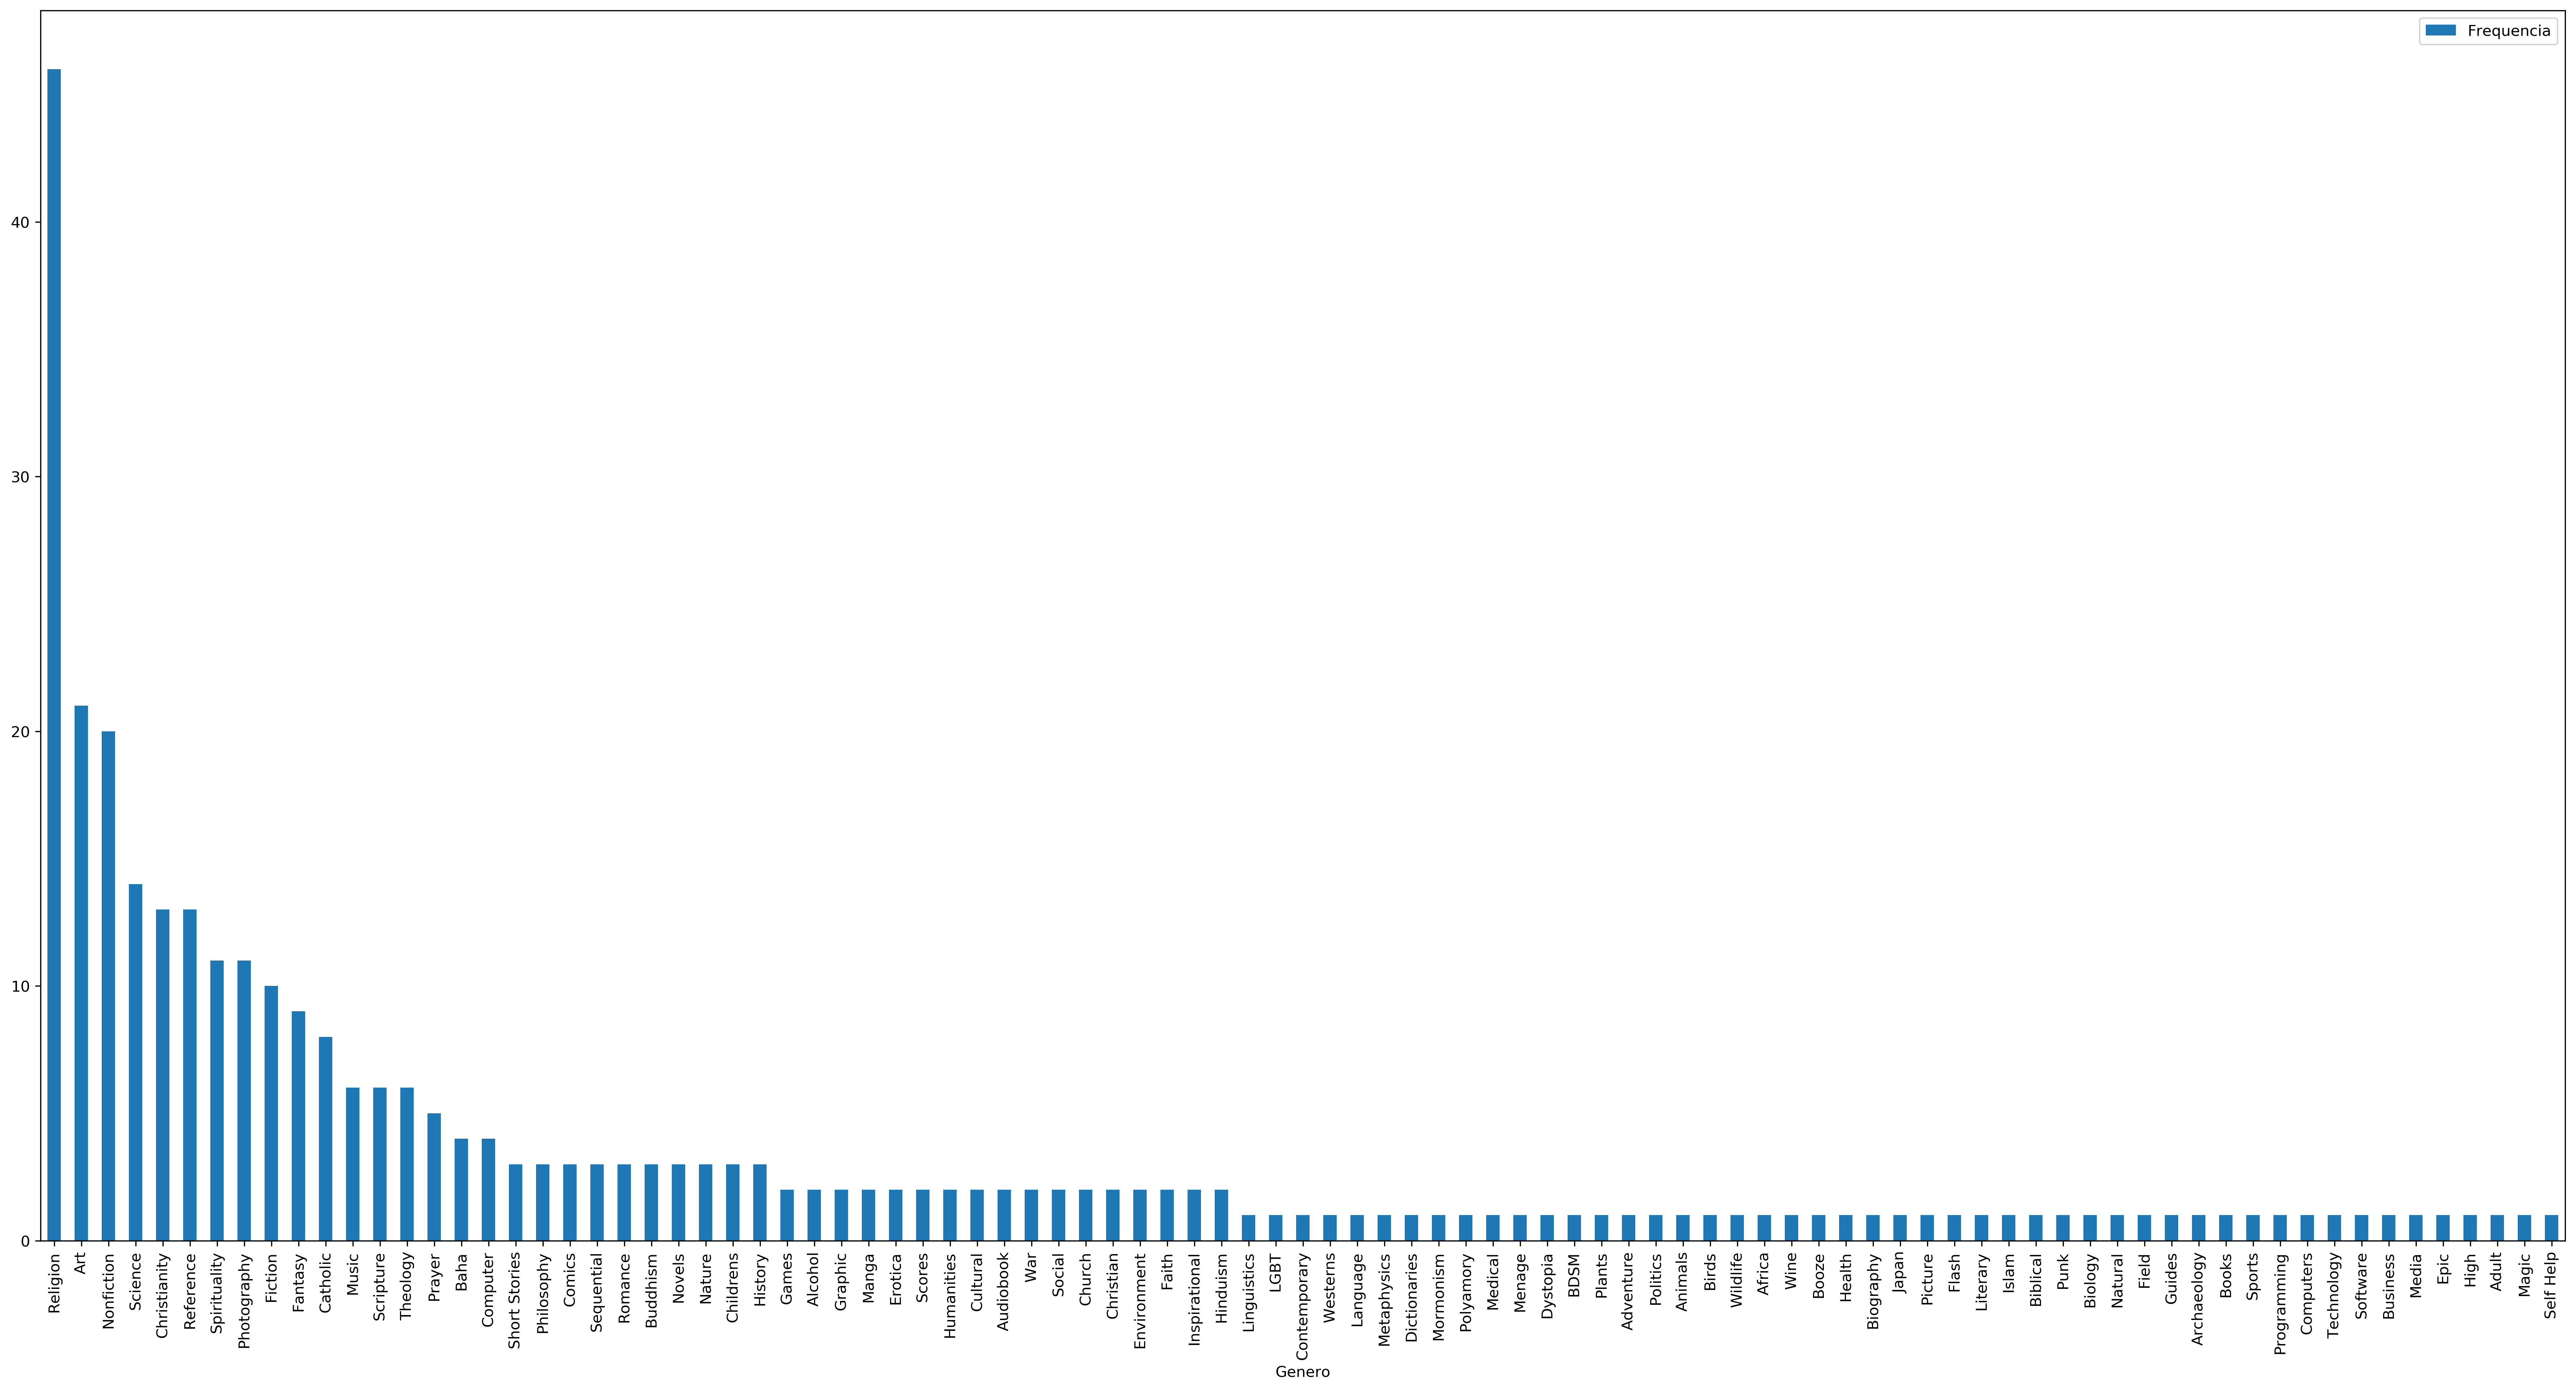

In [19]:
df2.plot(x ='Genero', y='Frequencia', kind = 'bar')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [30, 15]
#plt.savefig('C:/Users/Luigi/Desktop/GoodReads_100k_books.png')